In [4]:
import pandas as pd


In [2]:
from google.colab import files
uploaded = files.upload()


Saving NOaQjM.csv to NOaQjM.csv


In [3]:
df=pd.read_csv('NOaQjM.csv')
df.head()

,CustomerID,Genre,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


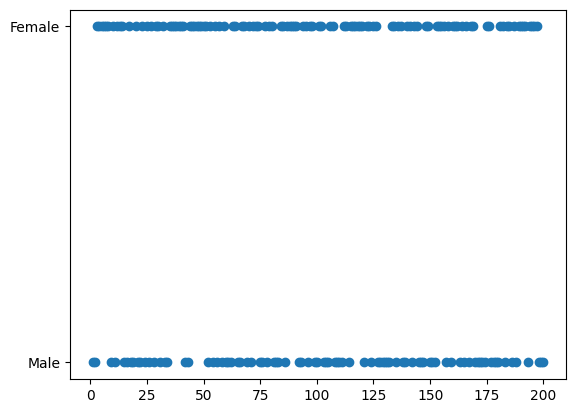

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df.iloc[:,0],df.iloc[:,1])

In [6]:
from sklearn.ensemble import IsolationForest

In [9]:
# Step 1: Encode 'Genre' column
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})

# Step 2: Drop non-relevant columns (like CustomerID if it's just an identifier)
X = df.drop('CustomerID', axis=1)

# Step 3: Fit IsolationForest
from sklearn.ensemble import IsolationForest
clf = IsolationForest(contamination=0.41)
clf.fit(X)


IsolationForest(contamination=0.41)

In [11]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# 1) Clean and select features used for modeling
df_clean = df.copy()

# Encode Genre (categorical to numeric)
df_clean['Genre'] = df_clean['Genre'].map({'Male': 0, 'Female': 1})

# Drop ID-like columns that don't carry signal
feature_cols = ['Genre', 'Age', 'Annual_Income', 'Spending_Score']
X = df_clean[feature_cols]

# 2) Fit IsolationForest on X
clf = IsolationForest(contamination=0.2, random_state=42)
clf.fit(X)

# 3) Predict on the SAME columns (same names, same order)
predictions = clf.predict(X)       # 1 = normal, -1 = anomaly
df_clean['Anomaly'] = predictions


In [12]:
predictions

array([-1, -1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1,
       -1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,
        1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1])

In [19]:
import numpy as np
index = np.where(predictions == 0)
index

(array([], dtype=int64),)

In [23]:
index

(array([], dtype=int64),)

In [20]:
x=df.values

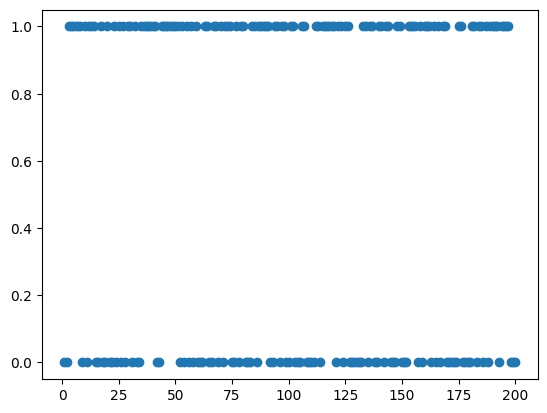

In [24]:
index=np.where(predictions ==0 )
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.scatter(x[index,0],x[index,1],edgecolor= 'r')

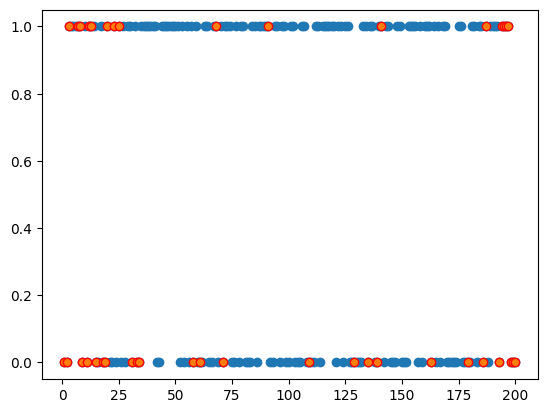

In [25]:
index = np.where(predictions == -1)  # -1 means anomaly
plt.scatter(x[:,0], x[:,1])
plt.scatter(x[index,0], x[index,1], edgecolor='r')
